In [1429]:
import pandas as pd
import numpy as np
import missingno as msno
import re
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


from sklearn.feature_extraction.text import CountVectorizer
#computes the similarity between the enterd value and the valus in our df
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_csv('../Data/skindataall.csv')


## EDA

In [1430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8649 non-null   int64  
 1   Username             8649 non-null   object 
 2   Skin_Tone            8649 non-null   object 
 3   Skin_Type            8649 non-null   object 
 4   Eye_Color            8649 non-null   object 
 5   Hair_Color           8649 non-null   object 
 6   Rating_Stars         8649 non-null   int64  
 7   Review               8649 non-null   object 
 8   Product              8649 non-null   object 
 9   Brand                8649 non-null   object 
 10  Price                8649 non-null   int64  
 11  Rating               8649 non-null   float64
 12  Ingredients          8649 non-null   object 
 13  Combination          8649 non-null   int64  
 14  Dry                  8649 non-null   int64  
 15  Normal               8649 non-null   i

In [1431]:
df.head(5)

,Unnamed: 0,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [1432]:

df.drop('Skin_Tone', inplace=True, axis=1)
df.drop('Eye_Color', inplace=True, axis=1)
df.drop('Hair_Color', inplace=True, axis=1)
df.drop('Product_Url', inplace=True, axis=1)
df.drop('Username', inplace=True, axis=1)
df.drop('Good_Stuff', inplace=True, axis=1)
df.drop('Ingredients', inplace=True, axis=1)
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('Review_Cleaned', inplace=True, axis=1)
df.drop('Price', inplace=True, axis=1)




In [1433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Skin_Type            8649 non-null   object 
 1   Rating_Stars         8649 non-null   int64  
 2   Review               8649 non-null   object 
 3   Product              8649 non-null   object 
 4   Brand                8649 non-null   object 
 5   Rating               8649 non-null   float64
 6   Combination          8649 non-null   int64  
 7   Dry                  8649 non-null   int64  
 8   Normal               8649 non-null   int64  
 9   Oily                 8649 non-null   int64  
 10  Sensitive            8649 non-null   int64  
 11  Category             8649 non-null   object 
 12  User_id              8649 non-null   int64  
 13  Product_id           8649 non-null   int64  
 14  Ingredients_Cleaned  8649 non-null   object 
 15  Ing_Tfidf            8649 non-null   o

In [1434]:
df.sample(5)

,Skin_Type,Rating_Stars,Review,Product,Brand,Rating,Combination,Dry,Normal,Oily,Sensitive,Category,User_id,Product_id,Ingredients_Cleaned,Ing_Tfidf
5936,Combination,3,I used this for a week and it made my skin fee...,Martian Mattifying Melting Water-Gel Toner,SUNDAY RILEY,3.9,1,0,1,1,1,Cleanser,3284,164,"['alcohol', 'denat', 'dicaprylyl', 'carbonate'...","alcohol, denat, dicaprylyl, carbonate, dimethy..."
7831,Combination,5,I’ve always had acne and bumps that last a fai...,Rapid Relief Acne Spot Treatment,MURAD,4.1,1,0,0,1,0,Treatment,5779,215,"['alcohol', 'hamamelis', 'virginiana', 'witch'...","alcohol, hamamelis, virginiana, witch, hazel, ..."
7891,Dry,4,This was recommended by a Sephora employee but...,Retinol Fusion PM,PETER THOMAS ROTH,4.4,0,0,0,0,0,Treatment,3537,220,"['cyclopentasiloxane', 'squalane', 'retinol', ...","cyclopentasiloxane, squalane, retinol, tocophe..."
7589,Oily,5,these pore strips are so cool. i leave them on...,Pore Treatment Strips,PEACE OUT,4.2,1,1,1,1,1,Treatment,6163,185,"['hydrocolloid', 'bandage', 'absorbs', 'sebum'...","hydrocolloid, bandage, absorbs, sebum, oil, de..."
3212,No data,5,This is a serum so it's meant to go on before ...,Hungarian Water Essence,BELIF,4.3,0,0,0,0,0,Moisturizer,3035,145,"['dipropylene', 'glycol', 'glycerin', 'hexaned...","dipropylene, glycol, glycerin, hexanediol, ros..."


<AxesSubplot:xlabel='Skin_Type'>

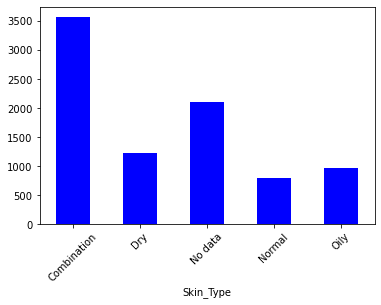

In [1436]:
# Distribution of users skin types 

majorty_skin_types = df.groupby('Skin_Type')['User_id'].count()
majorty_skin_types.plot.bar(color= 'blue', rot= 45)

In [1437]:
df.drop('Skin_Type', inplace=True, axis=1)

In [1438]:
no_of_items_per_cat = df.groupby('Category')['Product_id'].nunique()
no_of_items_per_cat

Category
Cleanser       140
Face Mask        1
Moisturizer     92
Treatment       82
Name: Product_id, dtype: int64

<AxesSubplot:xlabel='Category'>

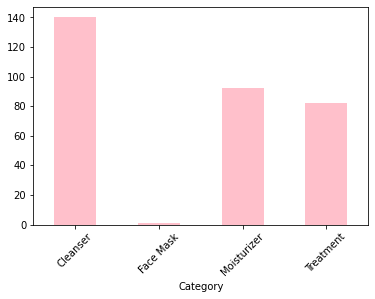

In [1439]:
#avalibality of products:
most_ava_cat = df.groupby('Category')['Product_id'].nunique()
most_ava_cat.plot.bar(color = 'pink', rot = 45, )


In [1441]:
#removing those 24
#REMOVING face mask
df = df[~df.Category.str.match('Face Mask')]

#RESETTING THE INDEX


<AxesSubplot:xlabel='Category'>

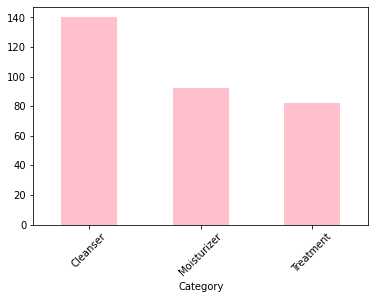

In [1442]:
most_ava_cat2 = df.groupby('Category')['Product_id'].nunique()
most_ava_cat2.plot.bar(color = 'pink', rot = 45, )
#face masks were removed

<AxesSubplot:xlabel='Category'>

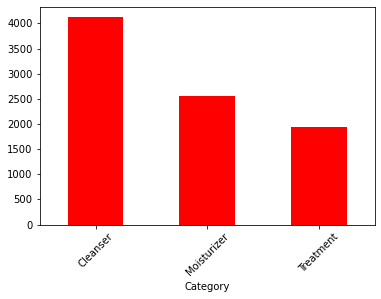

In [1443]:
# whats the most reviewd product category

most_sold_cat = df.groupby('Category')['User_id'].count()
most_sold_cat.plot.bar(color = 'red', rot = 45, )

In [1444]:

#general satasfaction level of userss based on ratings 
print(df.groupby('Rating_Stars')['User_id'].count())

Rating_Stars
1     837
2     634
3     688
4    1126
5    5340
Name: User_id, dtype: int64


<AxesSubplot:xlabel='Rating_Stars'>

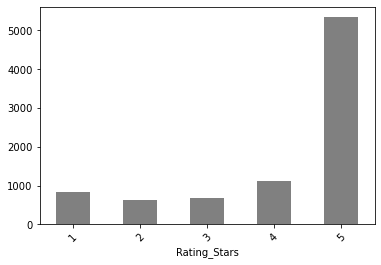

In [1445]:
#general satasfaction level of userss based on ratings (viz)

most_sold_cat = df.groupby('Rating_Stars')['User_id'].count()
most_sold_cat.plot.bar(color = 'gray', rot = 45, )

In [1446]:
#removing reviews and user ids (no longer needed was only used for general analysis)
df.drop('User_id', inplace=True, axis=1)
df.drop('Review', inplace=True, axis=1)


<AxesSubplot:>

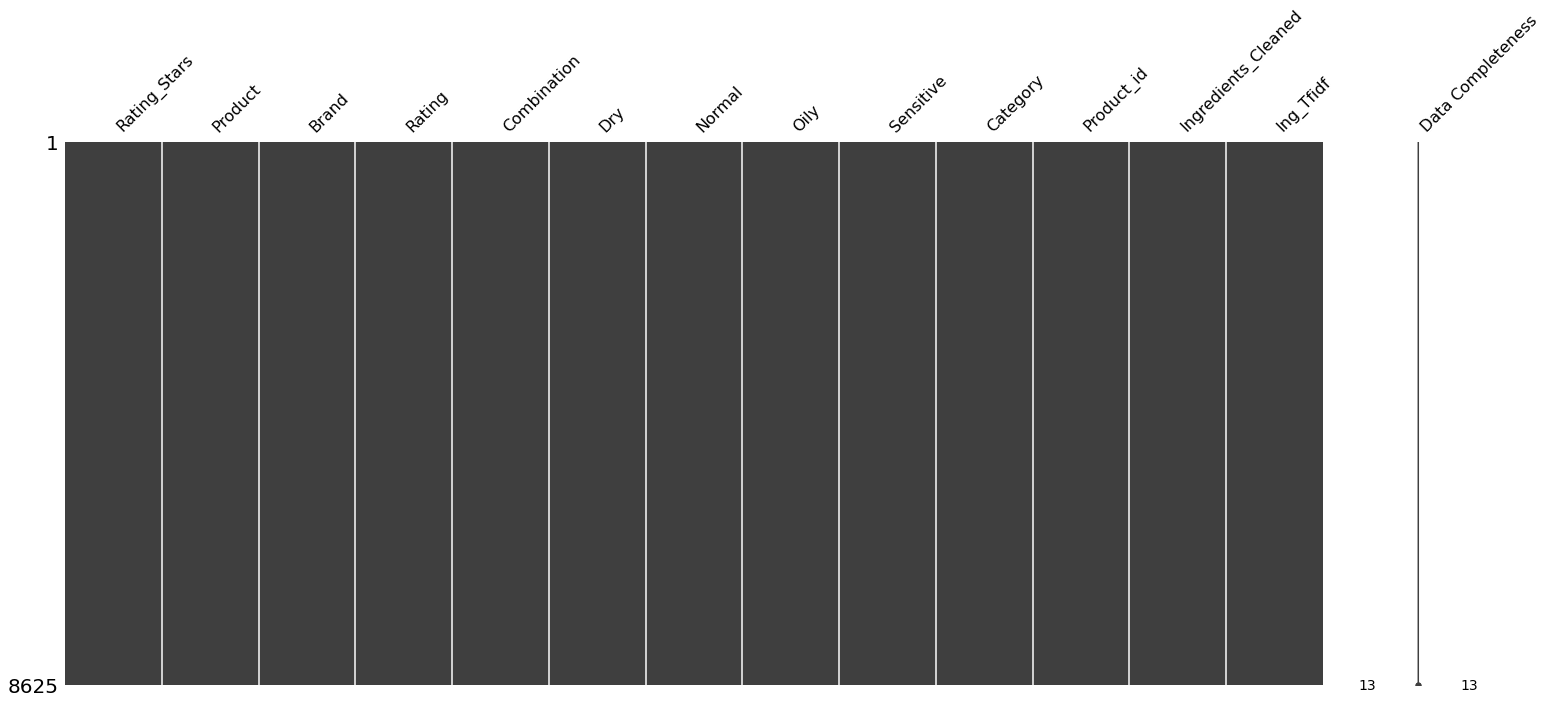

In [1447]:
msno.matrix(df, labels=True, filter="bottom", sort="ascending", n=20)


In [1448]:
df.nunique()

Rating_Stars             5
Product                314
Brand                   60
Rating                  18
Combination              2
Dry                      2
Normal                   2
Oily                     2
Sensitive                2
Category                 3
Product_id             314
Ingredients_Cleaned    298
Ing_Tfidf              298
dtype: int64